In [1]:
import pandas as pd

# Specify the file path
file_path = "/home/martin/Documents/Exjobb/eed/.data/augmented_data/train/augmented_data_0_noise_0_train.parquet"

# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
df["label"] = df["label"].astype(int)

In [2]:
df.describe()


,t,x,y,label,file_index,fs,std,std-diff,mean-diff,med-diff,bcea,bcea_diff,rms,rms-diff,disp,vel,acc,rayleightest
count,323211.000000,306787.000000,306787.000000,323211.000000,323211.000000,323211.0,323211.000000,323211.000000,323211.000000,323211.000000,3.232110e+05,323211.000000,323211.000000,323211.000000,323211.000000,323211.000000,3.232110e+05,3.232110e+05
mean,40.500875,0.119614,0.033684,1.359948,1.499998,1000.0,0.666722,-0.001148,1.749742,1.812361,1.800014e+00,-0.007604,0.083700,0.013665,2.632104,23.689927,3.687563e+03,1.466643e-04
std,23.325781,12.676349,7.889583,1.023218,1.118037,0.0,1.863872,2.454858,4.274396,5.030217,1.414001e+01,19.132840,0.299594,2.340026,6.678854,99.958262,1.926302e+04,8.734595e-03
min,0.100000,-33.643299,-16.410707,0.000000,0.000000,1000.0,0.020850,-22.534091,0.000111,0.000000,8.542578e-08,-812.839382,0.001567,-18.684517,0.145514,0.000041,9.201821e-10,3.100418e-18
25%,20.300000,-11.157394,-7.361914,1.000000,0.500000,1000.0,0.041922,-0.023200,0.053783,0.050720,5.186756e-03,-0.005468,0.035583,-0.061896,0.269469,1.935852,9.242315e+02,3.100662e-18
50%,40.501000,0.148208,0.129345,1.000000,1.000000,1000.0,0.052066,-0.000555,0.100408,0.088566,8.099585e-03,-0.000110,0.043812,-0.002358,0.336837,3.328266,1.595149e+03,3.101002e-18
75%,60.701500,10.975504,7.539763,1.000000,2.500000,1000.0,0.114157,0.014299,0.532602,0.245868,2.680579e-02,0.003384,0.059670,0.062692,0.706013,5.537597,2.566869e+03,3.102747e-18
max,80.902000,26.944281,42.080399,5.000000,3.000000,1000.0,22.614946,22.566109,45.350377,46.059248,8.111716e+02,812.923738,12.450620,20.773729,69.434271,5311.605313,1.750856e+06,9.875784e-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323211 entries, 0 to 323210
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   t             323211 non-null  float64
 1   x             306787 non-null  float32
 2   y             306787 non-null  float32
 3   status        323211 non-null  bool   
 4   label         323211 non-null  int64  
 5   file_index    323211 non-null  int64  
 6   file_name     323211 non-null  object 
 7   fs            323211 non-null  int64  
 8   std           323211 non-null  float64
 9   std-diff      323211 non-null  float64
 10  mean-diff     323211 non-null  float64
 11  med-diff      323211 non-null  float64
 12  bcea          323211 non-null  float64
 13  bcea_diff     323211 non-null  float64
 14  rms           323211 non-null  float64
 15  rms-diff      323211 non-null  float64
 16  disp          323211 non-null  float64
 17  vel           323211 non-null  float64
 18  acc 

### Distribution of labels

label
0      1443
1    273722
2     18834
3      8950
5     20262
Name: count, dtype: int64
Percentage of fixations:  84.69 %
Percentage of saccades:  5.83 %


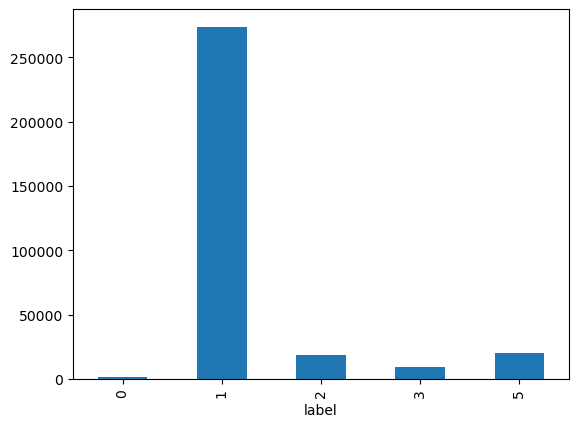

In [4]:
df['label'].value_counts().sort_index().plot(kind='bar')
print(df['label'].value_counts().sort_index())
fixation_percentage = round((df['label'].value_counts().sort_index()[1] / df['label'].value_counts().sum()) * 100, 2)
saccade_percentage = round((df['label'].value_counts().sort_index()[2] / df['label'].value_counts().sum()) * 100, 2)

print("Percentage of fixations: ", fixation_percentage, "%")
print("Percentage of saccades: ", saccade_percentage, "%")


### Distribution of labels when only looking at fixations and saccades

             t          x         y  status  label  file_index  \
0        0.100        NaN       NaN   False      5           0   
1        0.101        NaN       NaN   False      5           0   
2        0.102        NaN       NaN   False      5           0   
3        0.103        NaN       NaN   False      5           0   
4        0.104        NaN       NaN   False      5           0   
...        ...        ...       ...     ...    ...         ...   
323206  80.898 -17.200254  0.595527    True      1           3   
323207  80.899 -17.197559  0.630560    True      1           3   
323208  80.900 -17.232590  0.595527    True      1           3   
323209  80.901 -17.232590  0.606307    True      1           3   
323210  80.902 -17.248758  0.617086    True      1           3   

                    file_name    fs       std  std-diff  mean-diff   med-diff  \
0       lookAtPoint_EL_S1.npy  1000  5.739893 -1.198148   8.068265  14.851144   
1       lookAtPoint_EL_S1.npy  1000  5.636340

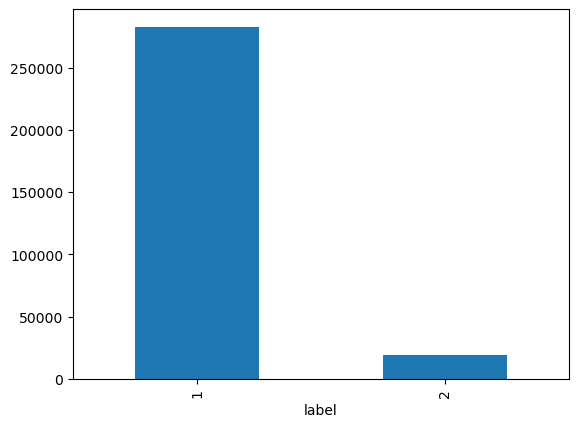

In [5]:
df_na_dropped = df.dropna()
print(df)
# Reassign labels 3 and 4 to label 1
df_na_dropped.loc[:, 'label'] = df_na_dropped['label'].replace({3: 1, 4: 1})

# Remove samples with label 1 and 5
df_na_dropped = df_na_dropped[(df_na_dropped['label'] != 5) & (df_na_dropped['label'] != 0)]

df_na_dropped['label'].value_counts().sort_index().plot(kind='bar')
print(df_na_dropped['label'].value_counts().sort_index())
fixation_percentage = round((df_na_dropped['label'].value_counts().sort_index()[1] / df_na_dropped['label'].value_counts().sum()) * 100, 2)
saccade_percentage = round((df_na_dropped['label'].value_counts().sort_index()[2] / df_na_dropped['label'].value_counts().sum()) * 100, 2)

print("Percentage of fixations: ", fixation_percentage, "%")
print("Percentage of saccades: ", saccade_percentage, "%")


In [6]:
features = df_na_dropped.drop(columns=['label',"x", "y","t", "status", "file_index", "file_name"])
features.describe()

,fs,std,std-diff,mean-diff,med-diff,bcea,bcea_diff,rms,rms-diff,disp,vel,acc,rayleightest
count,301506.0,301506.000000,301506.000000,301506.000000,301506.000000,301506.000000,301506.000000,301506.000000,301506.000000,301506.000000,301506.000000,301506.000000,3.015060e+05
mean,1000.0,0.549471,0.027104,1.566642,1.552855,0.956536,-0.044967,0.068811,0.039755,2.238354,18.601063,2908.773389,1.072320e-04
std,0.0,1.634010,2.402593,4.034756,4.663965,5.225783,13.740334,0.155860,2.087083,5.943827,69.598603,5201.247544,7.302788e-03
min,1000.0,0.020850,-22.534091,0.000111,0.000000,0.001500,-812.839382,0.023600,-18.234278,0.145514,0.000041,1.282872,3.100442e-18
25%,1000.0,0.041207,-0.022563,0.051544,0.048580,0.005392,-0.005403,0.036252,-0.058023,0.274859,2.052192,1012.822900,3.100680e-18
50%,1000.0,0.052291,-0.001271,0.091406,0.082134,0.008186,-0.000292,0.044021,0.000054,0.339529,3.356093,1644.087181,3.101012e-18
75%,1000.0,0.098376,0.015164,0.436003,0.208822,0.022594,0.003534,0.058174,0.064306,0.622473,5.370486,2573.750452,3.102529e-18
max,1000.0,15.235774,13.990481,33.272830,45.999075,241.302885,168.549400,12.230278,19.350452,64.047359,843.566192,188678.743375,9.875784e-01


## PCA analysis of features

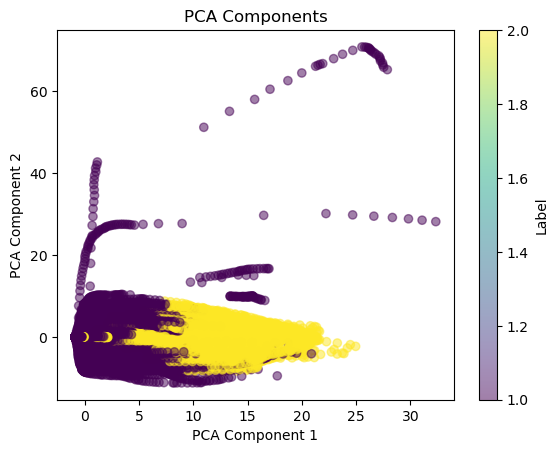

In [7]:
# Perform PCA with 2 components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Perform PCA on the normalized features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_features)

# Create a scatter plot of the PCA components, color-coded by labels
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_na_dropped["label"],alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components')
plt.colorbar(label='Label')
plt.show()


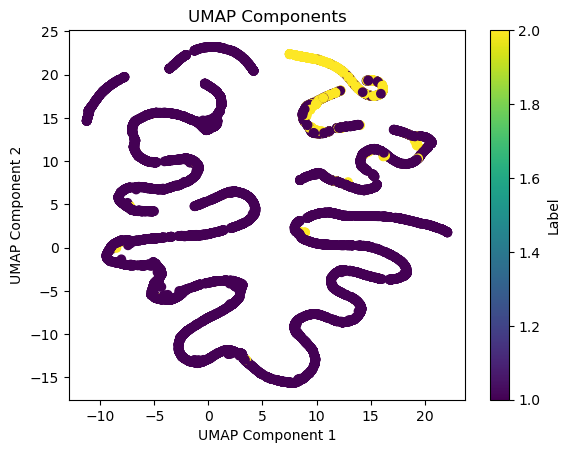

In [8]:
import umap as umap

# Sample 1000 samples
sample_df = df_na_dropped.sample(n=10000, random_state=42)

# Perform UMAP with 2 components on the sampled data
umap_components = umap.UMAP(n_components=2).fit_transform(sample_df[features.columns])

# Create a scatter plot of the UMAP components, color-coded by labels
plt.scatter(umap_components[:, 0], umap_components[:, 1], c=sample_df["label"])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Components')
plt.colorbar(label='Label')
plt.show()


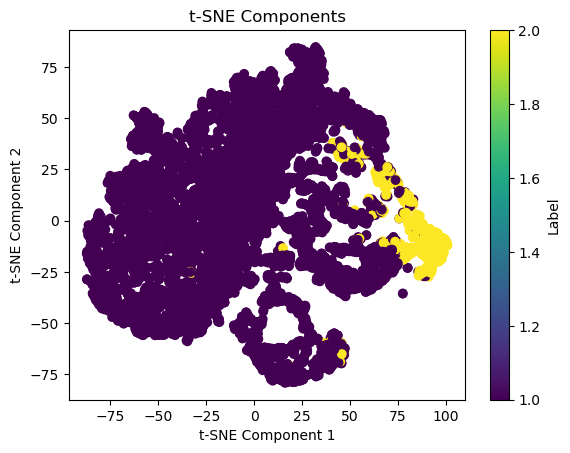

In [9]:
from sklearn.manifold import TSNE
sample_df = df_na_dropped.sample(n=10000, random_state=42)
normalized_features = scaler.fit_transform(sample_df[features.columns])


# Perform t-SNE with 2 components on the normalized features
tsne_components = TSNE(n_components=2).fit_transform(normalized_features)

# Create a scatter plot of the t-SNE components, color-coded by labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=sample_df["label"])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components')
plt.colorbar(label='Label')
plt.show()


### Sns pairplot

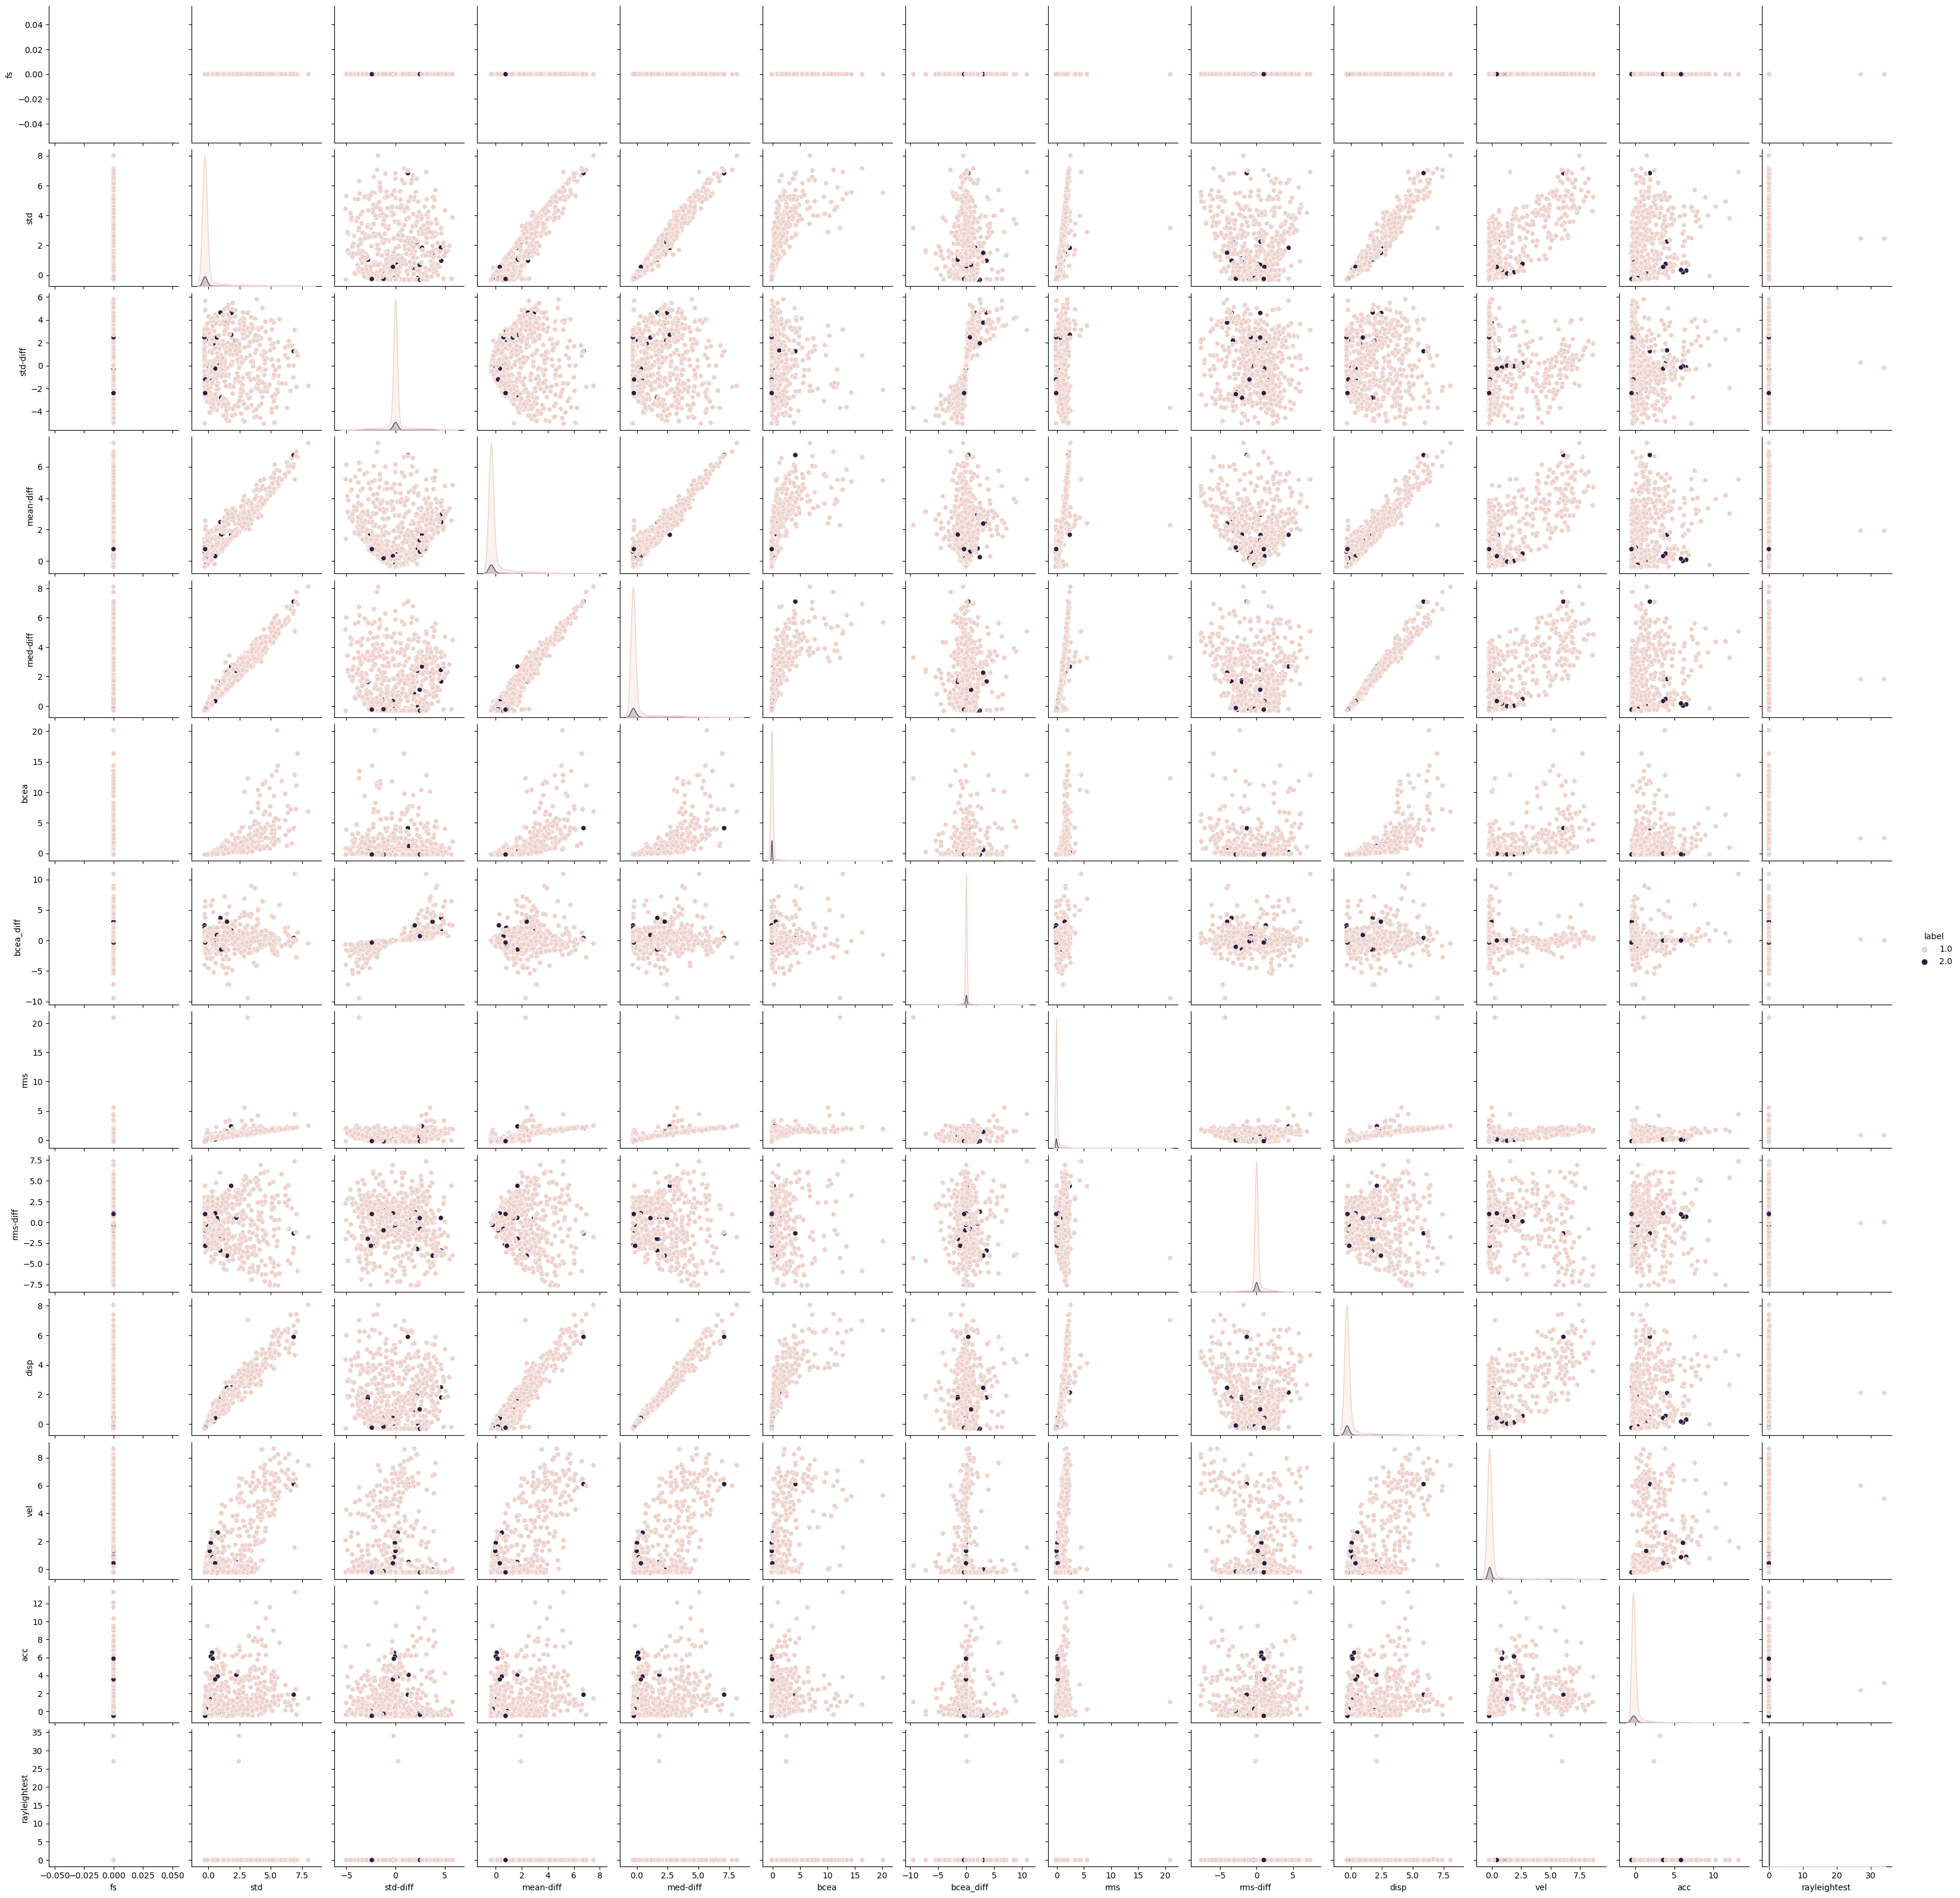

In [10]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
# Concatenate the features and labels into a single DataFrame
df_concat = pd.concat([features, df_na_dropped['label']], axis=1)

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_concat.iloc[:, :-1])

# Create a DataFrame with the normalized features and label
normalized_df = pd.DataFrame(normalized_features, columns=df_concat.columns[:-1])
normalized_df['label'] = df_concat['label']

# Randomly extract a subset of the data
subset_df = normalized_df.sample(n = 5000, random_state=42)

# Create a pairplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(subset_df, hue='label')


## Print correlations between features

In [11]:
correlation_matrix = features.corr()
correlation_ranking = correlation_matrix.unstack().sort_values(ascending=False)
correlation_ranking = correlation_ranking[correlation_ranking != 1]
pd.options.display.max_rows = 4000
print(correlation_ranking[1:400])


disp          med-diff        0.987628
std           med-diff        0.984095
med-diff      std             0.984095
disp          std             0.980418
std           disp            0.980418
med-diff      mean-diff       0.969323
mean-diff     med-diff        0.969323
disp          mean-diff       0.958273
mean-diff     disp            0.958273
std           mean-diff       0.947738
mean-diff     std             0.947738
vel           std             0.826391
std           vel             0.826391
med-diff      vel             0.770380
vel           med-diff        0.770380
bcea          std             0.766150
std           bcea            0.766150
vel           disp            0.763924
disp          vel             0.763924
              bcea            0.762411
bcea          disp            0.762411
vel           mean-diff       0.746943
mean-diff     vel             0.746943
bcea          med-diff        0.742082
med-diff      bcea            0.742082
mean-diff     bcea       

## Plot distributions of different features for saccades and fixations 

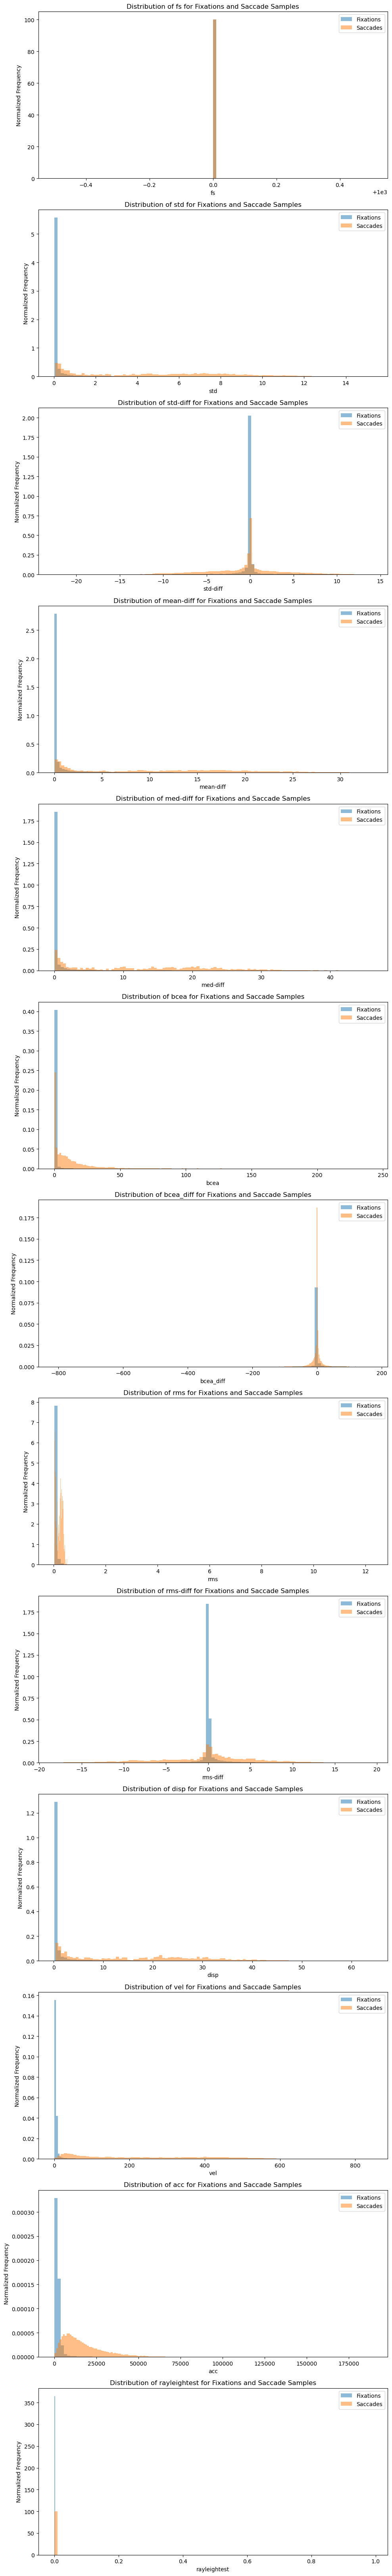

In [12]:
import matplotlib.pyplot as plt

# Get the list of feature column names
feature_columns = list(features.columns)

# Set the number of rows and columns for the subplots
num_rows = len(feature_columns)
num_cols = 1

# Create subplots for each feature
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

# Iterate over the feature columns
for i, feature in enumerate(feature_columns):
    # Extract samples where the label is 1
    label_1_samples = df_na_dropped[df_na_dropped['label'] == 1]

    # Extract samples where the label is 2
    label_2_samples = df_na_dropped[df_na_dropped['label'] == 2]

    # Plot the distribution of the feature for label 1 samples
    axs[i].hist(label_1_samples[feature], bins=100, alpha=0.5, label='Fixations', density=True)
    axs[i].hist(label_2_samples[feature], bins=100, alpha=0.5, label='Saccades', density=True)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Normalized Frequency')
    axs[i].set_title(f'Distribution of {feature} for Fixations and Saccade Samples')
    #axs[i].set_yscale('log')
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Variable importance with random forest


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your data
rf_classifier.fit(features, df_na_dropped['label'])

# Get the feature importances
importances = rf_classifier.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


         Feature  Importance
10           vel    0.411334
11           acc    0.165604
1            std    0.093235
5           bcea    0.062615
9           disp    0.054739
4       med-diff    0.042835
3      mean-diff    0.042614
2       std-diff    0.039744
7            rms    0.035934
6      bcea_diff    0.031086
8       rms-diff    0.020205
12  rayleightest    0.000054
0             fs    0.000000
